## Tracer Mass and HCW calculations using xarray

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import xarray as xr


In [3]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid_file_NoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc'

grid = xr.open_dataset(grid_file)
grid_NoC = xr.open_dataset(grid_file_NoC)

ptracer03 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
ptracer07 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc'

ptracer11 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/ptracersGlob.nc'
ptracer12 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/ptracersGlob.nc'
ptracer14 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/ptracersGlob.nc'

ptracer15 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/ptracersGlob.nc'
ptracer16 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/ptracersGlob.nc'
ptracer17 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/ptracersGlob.nc'
ptracer18 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/ptracersGlob.nc'

ptracer19 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/ptracersGlob.nc'
ptracer22 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run22/ptracersGlob.nc'
ptracer23 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run23/ptracersGlob.nc'
ptracer24 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run24/ptracersGlob.nc'

ptracer25 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run25/ptracersGlob.nc'
ptracer26 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run26/ptracersGlob.nc'
ptracer27 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run27/ptracersGlob.nc'
ptracer28 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run28/ptracersGlob.nc'

ptracer30 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run30/ptracersGlob.nc'
ptracer36 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run36/ptracersGlob.nc'
ptracer37 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run37/ptracersGlob.nc'
ptracer38 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc'

ptracer40 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run40/ptracersGlob.nc'
ptracer41 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run41/ptracersGlob.nc'
ptracer42 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/ptracersGlob.nc'

ptracer043D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/ptracersGlob.nc'
ptracer053D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/ptracersGlob.nc'
ptracer063D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc'
ptracer073D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/ptracersGlob.nc'

In [4]:
run03 = xr.open_dataset(ptracer03) 
run07 = xr.open_dataset(ptracer07)
run11 = xr.open_dataset(ptracer11)  
run12 = xr.open_dataset(ptracer12)  
run14 = xr.open_dataset(ptracer14)  

run15 = xr.open_dataset(ptracer15)  
run16 = xr.open_dataset(ptracer16)  
run17 = xr.open_dataset(ptracer17)  
run18 = xr.open_dataset(ptracer18)  

run19 = xr.open_dataset(ptracer19)  
run22 = xr.open_dataset(ptracer22)  
run23 = xr.open_dataset(ptracer23)  
run24 = xr.open_dataset(ptracer24)  

run25 = xr.open_dataset(ptracer25)  
run26 = xr.open_dataset(ptracer26)  
run27 = xr.open_dataset(ptracer27)  
run28 = xr.open_dataset(ptracer28)  

run30 = xr.open_dataset(ptracer30)  
run36 = xr.open_dataset(ptracer36)  
run37 = xr.open_dataset(ptracer37)  
run38 = xr.open_dataset(ptracer38)  
run40 = xr.open_dataset(ptracer40)  
run41 = xr.open_dataset(ptracer41)  
run42 = xr.open_dataset(ptracer42)  

run043D = xr.open_dataset(ptracer043D) 
run053D = xr.open_dataset(ptracer053D) 
run063D = xr.open_dataset(ptracer063D) 
run073D = xr.open_dataset(ptracer073D)

In [5]:
def TrOnShelf(Tr,hfacNoC,rA,drF):
  '''
  INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general
    hfacNoC : fraction of open cell for NoC case
    rA    : Area of cell faces at C points (HAS TO BE THE SIZE OF XY DOMAIN)
    drF   : Distance between cell faces (90)
    
    OUTPUT----------------------------------------------------------------------------------------------------------------
    Total_Tracer on given domain
                                                
  -----------------------------------------------------------------------------------------------------------------------
  '''

  TrMass  = (hfacNoC*Tr*rA*drF).sum(dim=['Z','Y','X'])
  
  return(TrMass*1000.0)
     
  

In [7]:
trac03 = TrOnShelf(run03.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac11 = TrOnShelf(run11.Tr2[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac12 = TrOnShelf(run12.Tr3[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac14 = TrOnShelf(run14.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac15 = TrOnShelf(run15.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac16 = TrOnShelf(run16.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac17 = TrOnShelf(run17.Tr3[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac18 = TrOnShelf(run18.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac19 = TrOnShelf(run19.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac36 = TrOnShelf(run36.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac37 = TrOnShelf(run37.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac38 = TrOnShelf(run38.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac043D = TrOnShelf(run043D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac053D = TrOnShelf(run053D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac063D = TrOnShelf(run063D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac073D = TrOnShelf(run073D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

trac07 = TrOnShelf(run07.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac22 = TrOnShelf(run22.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac23 = TrOnShelf(run23.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac24 = TrOnShelf(run24.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac25 = TrOnShelf(run25.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac26 = TrOnShelf(run26.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac27 = TrOnShelf(run27.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac28 = TrOnShelf(run28.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac30 = TrOnShelf(run30.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac40 = TrOnShelf(run40.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac41 = TrOnShelf(run41.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac42 = TrOnShelf(run42.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

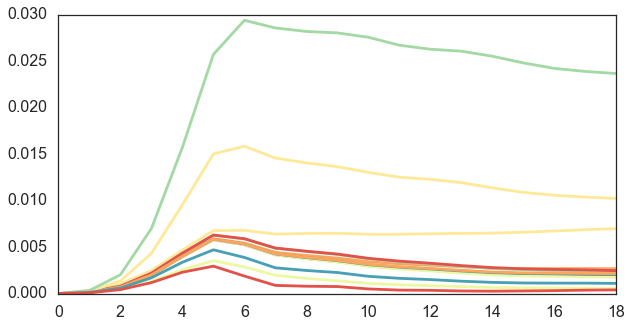

In [8]:
sns.set_context('poster')
sns.set_style('white')

sns.set_palette('Spectral')

labels = ['trac03','trac11','trac12','trac17','trac043D','trac053D','trac063D','trac073D','trac14','trac15','trac16',
          'trac18','trac19']
mass_list = [trac03-trac07,trac11-trac24,trac12-trac25,trac17-trac30,trac043D-trac30,trac053D-trac30,trac063D-trac07
             ,trac073D-trac07,trac14-trac26,trac15-trac27,trac16-trac28,trac18-trac22,trac19-trac23]

mass_list_NoC = [trac07,trac24,trac25,trac30,trac30,trac30,trac07,trac07,trac26,trac27,trac28,trac22,trac23]

fig,ax = plt.subplots(1,1,figsize=(10,5))
for mass,mass_NoC,lab in zip(mass_list,mass_list_NoC,labels):
    ax.plot(mass/mass_NoC)


In [6]:
trac03small = TrOnShelf(run03.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac11small = TrOnShelf(run11.Tr2[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac12small = TrOnShelf(run12.Tr3[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac14small = TrOnShelf(run14.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac15small = TrOnShelf(run15.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac16small = TrOnShelf(run16.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac17small = TrOnShelf(run17.Tr3[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac18small = TrOnShelf(run18.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac19small = TrOnShelf(run19.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac36small = TrOnShelf(run36.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac37small = TrOnShelf(run37.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac38small = TrOnShelf(run38.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac043Dsmall = TrOnShelf(run043D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac053Dsmall = TrOnShelf(run053D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac063Dsmall = TrOnShelf(run063D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac073Dsmall = TrOnShelf(run073D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])



trac07small = TrOnShelf(run07.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac22small = TrOnShelf(run22.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac23small = TrOnShelf(run23.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac24small = TrOnShelf(run24.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac25small = TrOnShelf(run25.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac26small = TrOnShelf(run26.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac27small = TrOnShelf(run27.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac28small = TrOnShelf(run28.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac30small = TrOnShelf(run30.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac40small = TrOnShelf(run40.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac41small = TrOnShelf(run41.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac42small = TrOnShelf(run42.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])


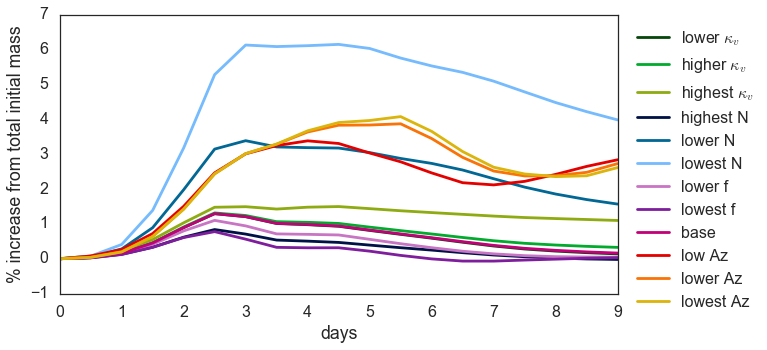

In [8]:
sns.set_context('poster')
sns.set_style('white')

sns.set_palette('Set1',9)

colors = ['forest green','kelly green','pea green','navy blue','peacock blue','sky blue','orchid','purple','magenta',
          'red','orange','gold']
labels = ['lower $\kappa_v$','higher $\kappa_v$','highest $\kappa_v$','highest N','lower N','lowest N',
          'lower f','lowest f','base','low Az','lower Az','lowest Az']
mass_list = [trac17small-trac30small,trac11small-trac24small,trac12small-trac25small,
             trac15small-trac27small,trac14small-trac26small,trac16small-trac28small,
             trac18small-trac22small,trac19small-trac23small,trac03small-trac07small,
             trac36small-trac40small,trac37small-trac41small,trac38small-trac42small,
            ]

mass_list_NoC = [trac30small,trac24small,trac25small,trac27small,trac26small,trac28small,
                 trac22small,trac23small,trac07small,trac40small,trac41small,trac42small]

fig,ax = plt.subplots(1,1,figsize=(10,5))
for mass,mass_NoC,lab,color in zip(mass_list,mass_list_NoC,labels,colors):
    ax.plot(np.arange(19)/2.0,100*mass/mass_NoC,color=sns.xkcd_rgb[color],label=lab)
    
ax.set_xlabel('days')
ax.set_ylabel('% increase from total initial mass')
ax.legend(loc='upper right', bbox_to_anchor=(1.27, 1))

fig.savefig('Mass_small_domain_canyon_effect.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


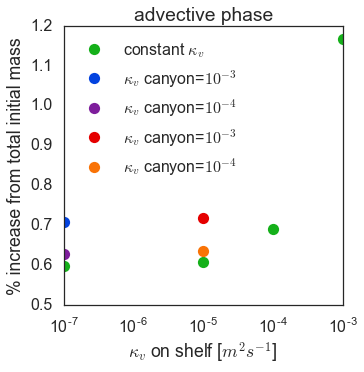

In [9]:
sns.set_context('poster')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v$','$\kappa_v$ canyon=$10^{-3}$','$\kappa_v$ canyon=$10^{-4}$','$\kappa_v$ canyon=$10^{-3}$','$\kappa_v$ canyon=$10^{-4}$']

colors = ['green','green','green','green','blue','purple','red','orange']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

mass_list = [trac17small-trac30small,trac03small-trac07small,trac11small-trac24small,trac12small-trac25small,
             trac043Dsmall-trac30small,trac053Dsmall-trac30small,trac063Dsmall-trac07small,trac073Dsmall-trac07small,
             ]

mass_list_NoC = [trac30small,trac07small,trac24small,trac25small,trac30small,trac30small,trac07small,trac07small]

fig,ax = plt.subplots(1,1,figsize=(5,5))
for mass,mass_NoC,lab,color,kv_num in zip(mass_list,mass_list_NoC,labels,colors,kv):
    ax.plot(kv_num,100*(mass/mass_NoC[0]).mean(),'o',color=sns.xkcd_rgb[color],label=lab)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf [$m^2s^{-1}$]')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')
ax.legend(loc=2)

fig.savefig('Mass_small_domain_canyon_effect_diffusivity.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


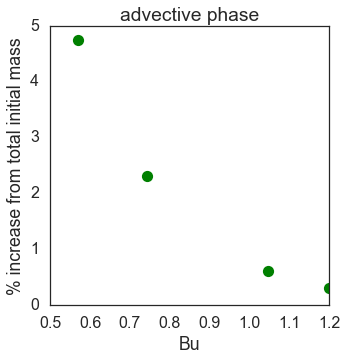

In [10]:
sns.set_context('poster')
sns.set_style('white')

sns.set_palette('Set1',9)


Hs = 152.5 # m
W = 8300.0 # m
N = np.array([5.5E-3,3.9E-3,6.3E-3,3.0E-3,5.5E-3,5.5E-3])
f = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,7.68E-5,4.84E-5])
Bu = (N*Hs)/(f*W)

mass_list = [trac03small-trac07small,trac14small-trac26small,trac15small-trac27small,trac16small-trac28small]

mass_list_NoC = [trac07small,trac26small,trac27small,trac25small,trac28small]

fig,ax = plt.subplots(1,1,figsize=(5,5))
for mass,mass_NoC,lab,color,bu in zip(mass_list,mass_list_NoC,labels,colors,Bu):
    ax.plot(bu,100*(mass/mass_NoC[0]).mean(),'go')

ax.set_xlabel('Bu')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')
ax.legend(loc=2)

fig.savefig('Mass_small_domain_canyon_effect_Nf.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


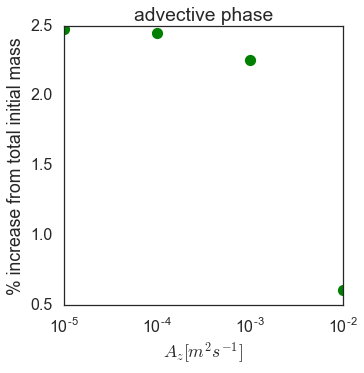

In [12]:
sns.set_context('poster')
sns.set_style('white')

sns.set_palette('Set1',9)


Az = np.array([1E-2,1E-3,1E-4,1E-5])

mass_list = [trac03small-trac07small,trac36small-trac40small,trac37small-trac41small,trac38small-trac42small]

mass_list_NoC = [trac07small,trac40small,trac41small,trac42small]

fig,ax = plt.subplots(1,1,figsize=(5,5))
for mass,mass_NoC,lab,color,visc in zip(mass_list,mass_list_NoC,labels,colors,Az):
    ax.plot(visc,100*(mass/mass_NoC[0]).mean(),'go')

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$A_z [m^2s^{-1}]$')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')
ax.legend(loc=2)

fig.savefig('Mass_small_domain_canyon_effect_viscosity.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')
